## Exploratory Data Analysis

After importing and clean up the data, the next step is exploratory data analysis (EDA), where you get a feel for your data by summarizing its main characteristics using descriptive statistics and data visualization. A good way to plan your EDA is by looking each column and asking yourself questions what it says about your dataset.

In [33]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px

In [5]:
# Import the cleaned up data
df = pd.read_csv("mexico-real-state-clean.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


### Visualise location data

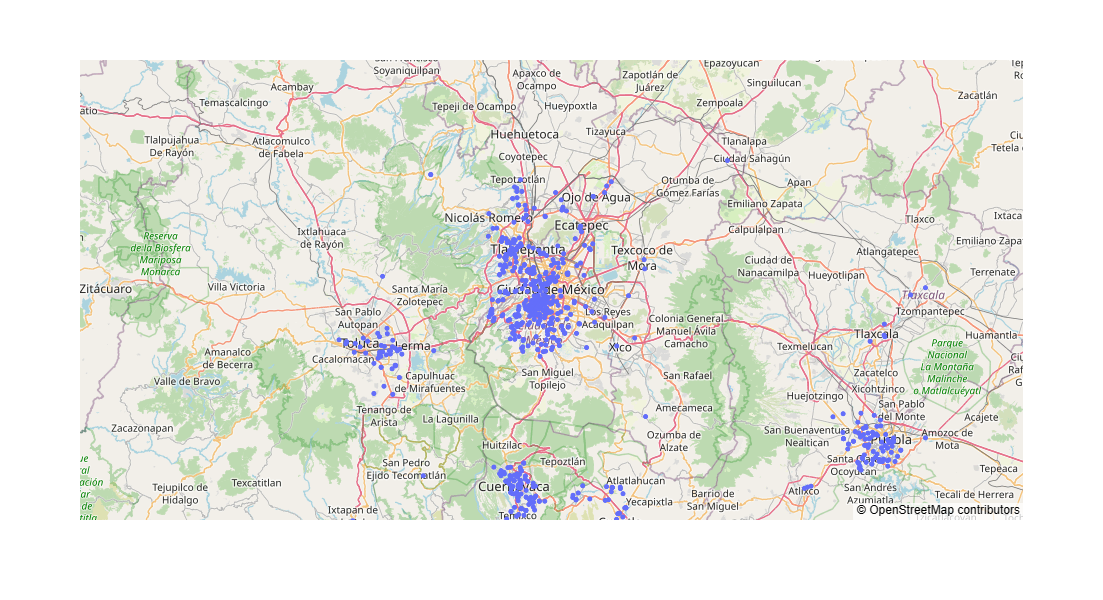

In [7]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": 19.43,"lon": -99.13},
    width=600,
    height=600,
    hover_data=["price_usd"],
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

### Aggregate categorical data

Even though we can get a good idea of which states are most common in our dataset from looking at a map, we can also get the exact count by using the "state" column.

In [20]:
display("Total states",df["state"].nunique(), "----------------------------------------------" )
display("10 most relevant states",df["state"].value_counts().head(10))

'Total states'

30

'----------------------------------------------'

'10 most relevant states'

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Name: count, dtype: int64

### Summarise numerical data

We have a sense for where the houses in our dataset are located, but how much do they cost?                                                          How big are they? The best way to answer those questions is looking at descriptive statistics. 

In [43]:
df[["area_m2","price_usd"]].describe()

area_m2      price_usd
count  1736.000000    1736.000000
mean    170.261521  115331.980766
std      80.594539   65426.173873
min      60.000000   33157.890000
25%     101.750000   65789.470000
50%     156.000000   99262.130000
75%     220.000000  150846.665000
max     385.000000  326733.660000

#### Arear M²

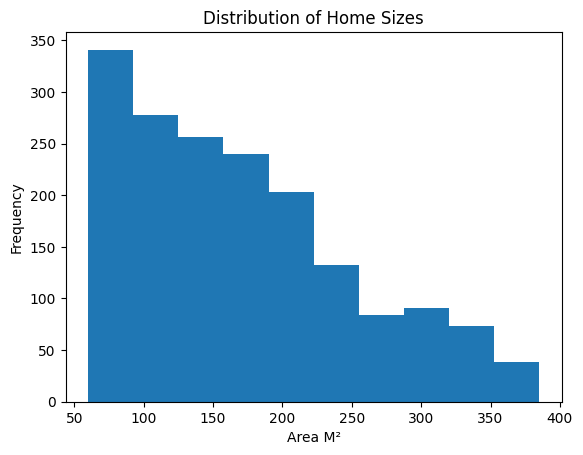

In [38]:
plt.hist(df['area_m2'])
plt.xlabel("Area M²")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes");

Looking at our histogram, we can see that "area_m2" skews right. In other words, there are more houses at the lower end of the distribution (50–200m2) than at the higher end (250–400m2). That explains the difference between the mean and the median.

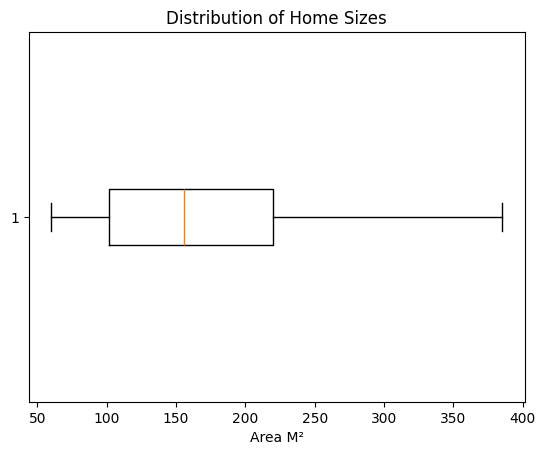

In [42]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area M²")
plt.title("Distribution of Home Sizes");

#### Price

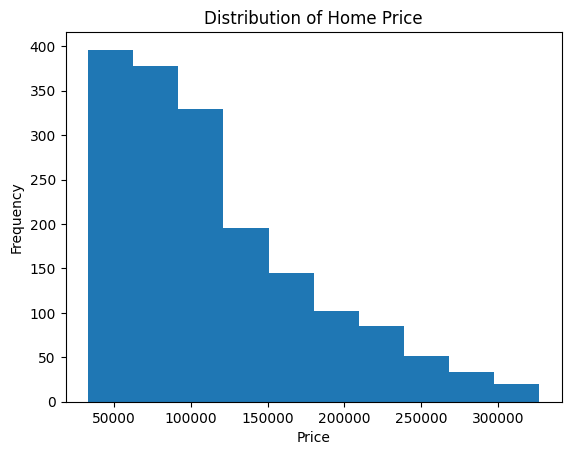

In [44]:
plt.hist(df['price_usd'])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Home Price");

Looks like "price_usd" is even more skewed than "area_m2". What does this bigger skew look like in a boxplot?

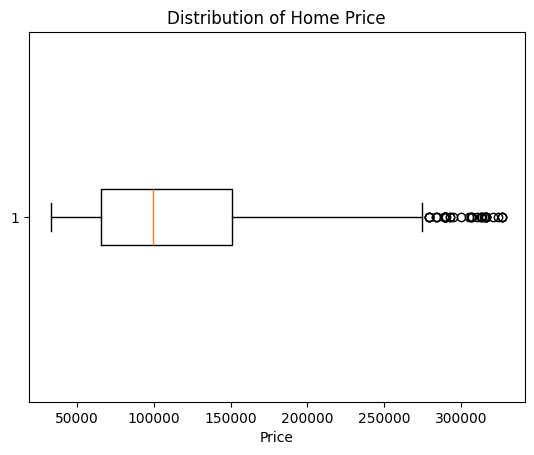

In [45]:
plt.boxplot(df["price_usd"], vert=False)
plt.xlabel("Price")
plt.title("Distribution of Home Price");

## Location or Size: What Influences House Prices in Mexico?

### Which state has the most expensive real estate market?

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home?

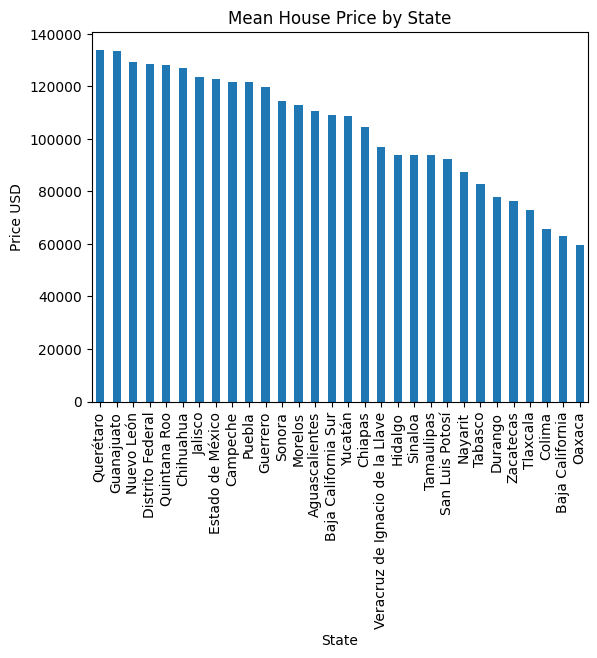

In [62]:
mean_price_by_state = (df.groupby("state")["price_usd"]
                       .mean()
                       .sort_values(ascending=False)
                       .round(2))
mean_price_by_state
mean_price_by_state.plot(
    kind='bar',
    xlabel="State",
    ylabel="Price USD",
    title="Mean House Price by State"
);

With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, we need to create a new column.

In [63]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]
df.head()

property_type             state        lat         lon  area_m2  price_usd  \
0         house  Estado de México  19.560181  -99.233528      150   67965.56   
1         house        Nuevo León  25.688436 -100.198807      186   63223.78   
2     apartment          Guerrero  16.767704  -99.764383       82   84298.37   
3     apartment          Guerrero  16.829782  -99.911012      150   94308.80   
4         house           Yucatán  21.052583  -89.538639      205  105191.37   

   price_per_m2  
0    453.103733  
1    339.912796  
2   1028.028902  
3    628.725333  
4    513.128634

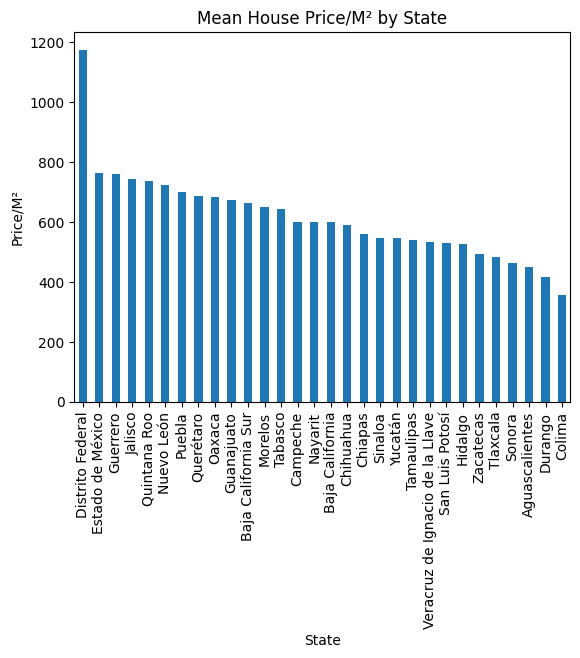

In [72]:
(
    df
 .groupby("state")["price_per_m2"]
 .mean()
 .sort_values(ascending=False)
 .round(2)
 .plot(
     kind="bar",
     xlabel="State",
     ylabel="Price/M²",
     title="Mean House Price/M² by State"
     )
);
#mean_price_per_m2_by_state

Now we see that the capital Mexico City (Distrito Federal) is by far the most expensive market. Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets. So it looks like this bar chart is a more accurate reflection of state real estate markets.

### Is there a relationship between home size and price?

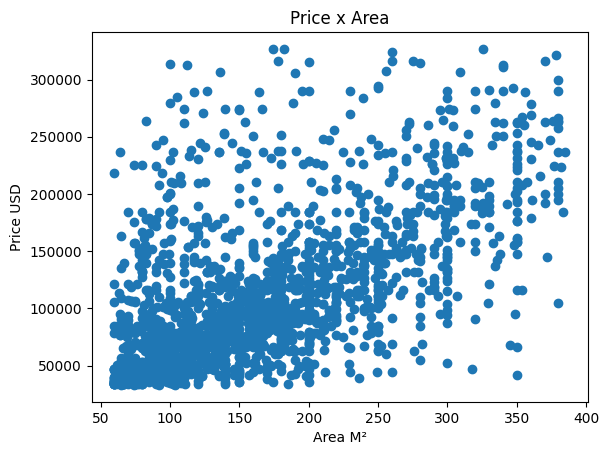

In [75]:
plt.scatter(x=df["area_m2"], y=df["price_usd"])
plt.xlabel("Area M²")
plt.ylabel("Price USD")
plt.title("Price x Area");

While there's a good amount of variation, there's definitely a positive correlation — in other words, the bigger the house, the higher the price. But how can we quantify this correlation?

In [79]:
p_correlation = df["price_usd"].corr(df["area_m2"])
display(p_correlation.round(3))

0.586

The correlation coefficient is over 0.5, so there's a moderate relationship house size and price in Mexico. But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

### Does the Mexico City have the same correlation for price and area 

0.411

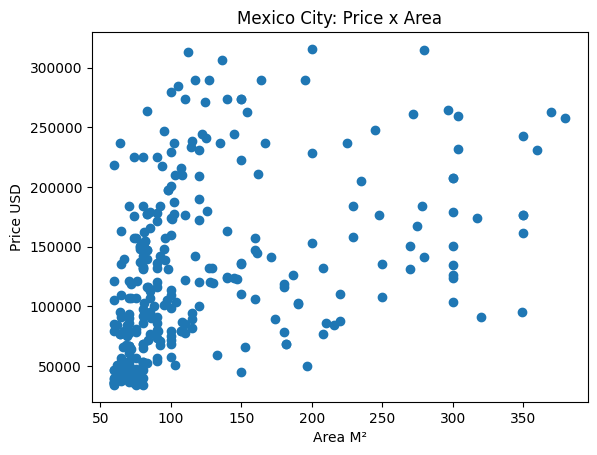

In [88]:
df_mexico_city = df[df["state"] == "Distrito Federal"]
display(df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"]).round(3))
plt.scatter(x=df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])
plt.xlabel("Area M²")
plt.ylabel("Price USD")
plt.title("Mexico City: Price x Area");

One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price.